# Regression Notebook with PyGRN

In [1]:
from pygrn import grns, problems, evolution, config
import argparse
import os
import numpy as np
import matplotlib.pyplot as plt
from loguru import logger



# Creation of the Regression problem
def f(t, f: float = 1, k: int = 3):
    """ Fourrier decomposition of a square signal

    Args:
        t (float): time
        f(float, optional): frequency. Defaults to 1. 
        k (int, optional): degree of decomposition. Defaults to 2.

    Returns:
        values
    """
    y = np.zeros(t.shape[0])
    for i in range(0, k):

        y += np.sin((2*i + 1) * 2*np.pi*f*t)/(2*i + 1)
    
    
    y /= (4/np.pi)
    
    # transform values between 0 and 1
    y = (y - np.min(y)) / (np.max(y) - np.min(y))
    
    return y

def f_lin(t):

    return t

class Regression(problems.base.Problem):
    def __init__(self, x_train, y_train):
        super().__init__("regression")
        self.namestr = "regression"
        self.nin = 1
        self.nout = 1
        self.cacheable = True

        self.x_train = x_train
        self.y_train = y_train

        
    def eval(self, grn):

        grn.setup()
        grn.warmup(25)
        fit = 0.0
        for i in range(max(self.x_train.shape)):
            grn.set_input(self.x_train[i])
            grn.step()
            fit += np.linalg.norm(grn.get_output().item() - self.y_train[i]).item()

        return 1-fit


2025-07-23 16:52:30.963 | INFO     | pygrn.evolution.evolution:report:80 - Generation 0: best fit -147.73677501067192, fit mean -297.3302073362224, fit std 199.47778207052815
2025-07-23 16:52:37.601 | INFO     | pygrn.evolution.evolution:report:80 - Generation 1: best fit -144.6431249760316, fit mean -300.9234196163059, fit std 233.24481961646467
2025-07-23 16:52:49.105 | INFO     | pygrn.evolution.evolution:report:80 - Generation 2: best fit -144.6431249760316, fit mean -240.99917909499447, fit std 151.91522951041318
2025-07-23 16:52:56.614 | INFO     | pygrn.evolution.evolution:report:80 - Generation 3: best fit -81.77729548123679, fit mean -281.60454216897176, fit std 233.78647227187258
2025-07-23 16:53:05.385 | INFO     | pygrn.evolution.evolution:report:80 - Generation 4: best fit -81.77729548123679, fit mean -242.06332553941243, fit std 179.6110853714175
2025-07-23 16:53:13.190 | INFO     | pygrn.evolution.evolution:report:80 - Generation 5: best fit -81.77729548123679, fit mean 

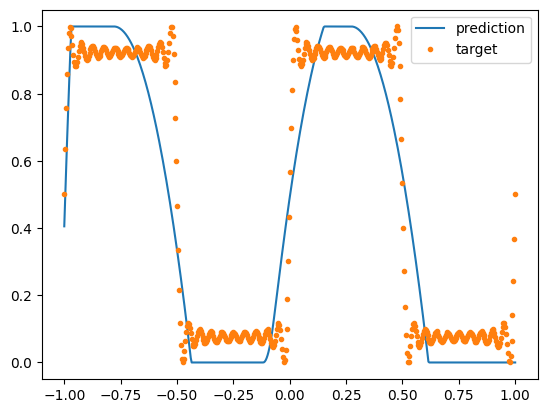

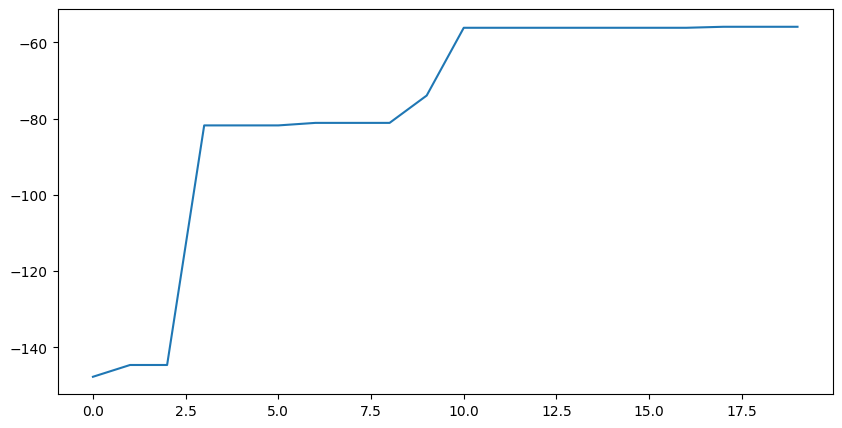

In [4]:
t = np.linspace(-1, 1, 500)
y = f(t, f=1, k=10)
    
# logger.remove()
logger.level("INFO")
grn = lambda : grns.DissetGRN()
problem = Regression(t, y)


grneat = evolution.Evolution(problem, grn, num_workers=10)
best_fit, best_ind = grneat.run(20)

best_fit_history = grneat.best_fit_history
logger.info("best fit: ", best_fit)
# problem.eval(grneat.best_grn)
    
# y_eval = f(t_eval)
best_grn = best_ind.grn

best_grn.setup()
best_grn.warmup(25)
y_eval = []
for i in range(max(t.shape)):
    best_grn.set_input(t[i])
    best_grn.step()
    y_eval.append(best_grn.get_output().item())


plt.plot(t, y_eval, label="prediction")
plt.plot(t, y, '.', label="target")

plt.legend()
plt.figure(figsize=(10, 5))
plt.plot(best_fit_history)
plt.show()

delta =  0.054807707440597986
belta =  1.9565924736274056
[0.         0.27626952 0.43522946 0.28850102]
[0.01010101 0.27393046 0.43941022 0.28665932]
[0.02020202 0.2715588  0.44365152 0.28478968]
[0.03030303 0.26915447 0.44795353 0.28289201]
[0.04040404 0.26671736 0.45231642 0.28096622]
[0.05050505 0.2642474  0.45674036 0.27901224]
[0.06060606 0.2617445  0.46122551 0.27702998]
[0.07070707 0.25920858 0.46577205 0.27501937]
[0.08080808 0.25663956 0.47038012 0.27298032]
[0.09090909 0.25403736 0.47504988 0.27091276]
[0.1010101  0.25140189 0.47978148 0.26881662]
[0.11111111 0.2487331  0.48457508 0.26669182]
[0.12121212 0.24603091 0.48943081 0.26453829]
[0.13131313 0.24329523 0.49434881 0.26235596]
[0.14141414 0.24052602 0.49932922 0.26014476]
[0.15151515 0.2377232  0.50437218 0.25790462]
[0.16161616 0.23488671 0.50947781 0.25563549]
[0.17171717 0.23201648 0.51464623 0.25333729]
[0.18181818 0.22911247 0.51987757 0.25100996]
[0.19191919 0.2261746  0.52517194 0.24865346]
[0.2020202  0.22320284

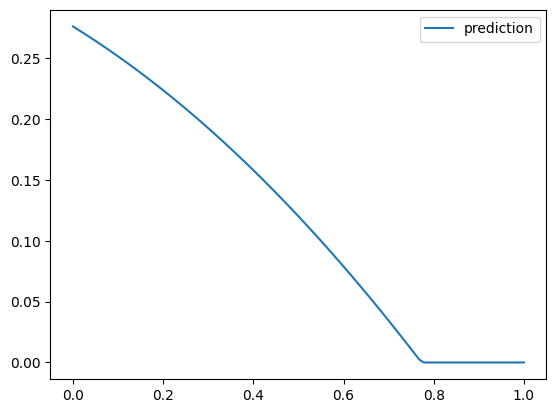

<Figure size 1000x500 with 0 Axes>

In [5]:
# test a random genome 
from pygrn import grns, problems, evolution, config
import argparse
import os
import numpy as np
import matplotlib.pyplot as plt
from loguru import logger



grn = grns.ClassicGRN()
grn.random(1, 1, 2)
t = np.linspace(0, 1, 100)

print("delta = ", grn.delta)
print("belta = ", grn.beta)
grn.setup()
grn.warmup(25)
y_eval = []
for i in range(max(t.shape)):
    grn.set_input(t[i])
    grn.step()

    print(grn.concentration)
    y_eval.append(grn.get_output().item())

plt.plot(t, y_eval, label="prediction")
# plt.plot(t, y, label="target")

plt.legend()
plt.figure(figsize=(10, 5))
# plt.plot(best_fit_history)
plt.show()

# Double the frequence of a sinus
- see [1] for explanantion 

In [6]:
import numpy as np
import numba
from pygrn import grns, problems, evolution, config
from pygrn.problems import double
import argparse
import os
import numpy as np
import matplotlib.pyplot as plt
from loguru import logger

class DoubleFreq(problems.base.Problem):


    def __init__(self, namestr="double_frequence", period = 2 ): 

        super().__init__(namestr)
        self.nin = 1
        self.nout = 1
        self.cacheable = True

        self.T = period

        t = np.linspace(-5, 5, 1000)
        self.x_train = 0.5*np.sin(2*np.pi*t/self.T) + 0.5
        self.y_train = 0.5*np.sin(2*np.pi*t/(self.T/2)) + 0.5

    # numba.jit
    def eval(self, grn):
        grn.setup()
        grn.warmup(25)
        fit = 0.0
        for i in range(max(self.x_train.shape)):
            grn.set_input(self.x_train[i])
            grn.step()
            fit += np.linalg.norm(grn.get_output().item() - self.y_train[i]).item()


        return 1-fit

period = 2
grn = lambda : grns.ClassicGRN()

problem = double.DoubleFrequency()

grneat = evolution.Evolution(problem, grn, num_workers=30)

beft_fit, best_ind = grneat.run(100)

best_fit_history = grneat.best_fit_history
logger.info("best fit: ", best_fit)
# problem.eval(grneat.best_grn)
    
plt.figure(figsize=(10, 5))
plt.plot(best_fit_history)
plt.show()



2025-07-23 16:57:26.006 | INFO     | pygrn.evolution.evolution:report:80 - Generation 0: best fit -368.2996079011685, fit mean -731.7197460185242, fit std 188.33849583188004
2025-07-23 16:57:39.724 | INFO     | pygrn.evolution.evolution:report:80 - Generation 1: best fit -304.5486068739532, fit mean -678.610312286554, fit std 179.30188037945095
2025-07-23 16:57:55.901 | INFO     | pygrn.evolution.evolution:report:80 - Generation 2: best fit -284.6100518965044, fit mean -638.0133528855406, fit std 178.75583562756637
2025-07-23 16:58:13.509 | INFO     | pygrn.evolution.evolution:report:80 - Generation 3: best fit -273.9711371767071, fit mean -610.6612116510214, fit std 175.48008312493744
2025-07-23 16:58:32.768 | INFO     | pygrn.evolution.evolution:report:80 - Generation 4: best fit -273.9711371767071, fit mean -589.2353187023368, fit std 170.9812498075381
2025-07-23 16:58:53.370 | INFO     | pygrn.evolution.evolution:report:80 - Generation 5: best fit -273.9711371767071, fit mean -573.

KeyboardInterrupt: 

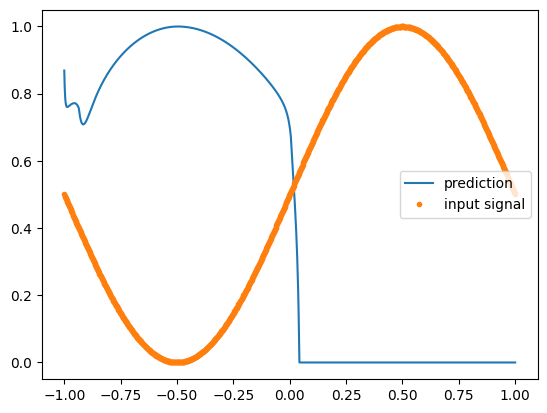

In [13]:
# eval grn
period = 2
t = np.linspace(-1, 1, 1000)
input_sig = 0.5*np.sin(2*np.pi*t/period) + 0.5

best_grn = best_ind.grn

best_grn.setup()
best_grn.warmup(25)
y_eval = []
for i in range(max(t.shape)):
    best_grn.set_input(input_sig[i])
    best_grn.step()
    y_eval.append(best_grn.get_output().item())


plt.plot(t, y_eval, label="prediction")
plt.plot(t, input_sig, '.', label="input signal")

plt.legend()

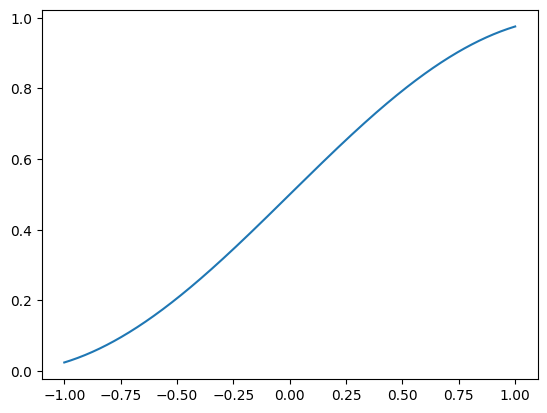

In [ ]:

y_train = 0.5*np.sin(2*np.pi*t/(period*0.5)) + 0.5
plt.plot(t, y_train)

# REINFORCEMENT WITH GRN 

In [2]:
import gymnasium as gym
from gymnasium import wrappers
from pygrn import grns, problems, evolution, config
import numpy as np
from loguru import logger   
class RLCorrector(problems.base.Problem):

    def __init__(self, env_name="Pendulum-v1"): 

        namestr = env_name
        super().__init__(namestr)

        # self.train_env = wrappers.NormalizeObservation(gym.make(env_name))
        self.vis_env = gym.make(env_name, render_mode="human")
        
        action_space = self.vis_env.action_space
        observation_space = self.vis_env.observation_space
        self.has_continuous_action = isinstance(action_space, gym.spaces.Box)
        self.has_continuous_observation = isinstance(observation_space, gym.spaces.Box)
        self.nin = self.vis_env.observation_space.shape[0]

        self.dtype = float


        if self.has_continuous_observation:
            self.nin = self.vis_env.observation_space.shape[0]
            self.h_obs = self.vis_env.observation_space.high
            self.l_obs = self.vis_env.observation_space.low
            self.dtype = float


        if self.has_continuous_action:
            self.nout = self.vis_env.action_space.shape[0]
            self.h_act = self.vis_env.action_space.high
            self.l_act = self.vis_env.action_space.low
            self.dtype = int

        else:
            self.nout = 1
            self.n = self.vis_env.action_space.n
        
        self.cacheable = True


    def eval(self, grn, render = False):
        
        n_eval_episode = 1

        fit = 0
        reward = 0
        ts = 0

        while len(envs) < 1:
            pass
        eval_env = envs.pop()

        for i in range(n_eval_episode):
            grn.setup()
            grn.warmup(25)

            obs, _ = eval_env.reset(seed=0)
            done = False

            while True:


                # if self.has_continuous_observation:
                #     (obs - self.l_obs) / (self.h_obs - self.l_obs)  # map action to [0, 1]
                grn.set_input(obs)
                grn.step()
                # print("grn best output ", grn.get_output().item())
                if self.has_continuous_action:
                    action = grn.get_output() * (self.h_act - self.l_act) + self.l_act
                else:
                    action = int(grn.get_output()[0] * (self.n - 1))

                # print("action ", action)s
                # print(action)
                # action = 1 if grn.get_output().item() > 0.5 else 0
                obs, r, terminated, truncated, info = eval_env.step(action)
            
                if terminated or truncated:
                    done = True
                    break
                reward += r
                ts += 1
  
            fit = reward / n_eval_episode

            # if fit ==0:
                # logger.debug(f"fit = {fit} ")

        envs.append(eval_env)
        # print("reward = ", reward, "\t steps = ", ts)
        return fit 
    
    def visualize_grn(self, grn):
    

        fit = 0
        reward = 0
        ts = 0
        grn.setup()
        grn.warmup(25)

        obs, _ = self.vis_env.reset(seed=0)
        done = False

        actions = []
        while True:


            # if self.has_continuous_observation:
            #     obs = (obs - self.l_obs) / (self.h_obs - self.l_obs)  # map action to [0, 1]
            grn.set_input(obs)
            grn.step()
            # print("grn best output ", grn.get_output().item())
            if self.has_continuous_action:
                action = grn.get_output() * (self.h_act - self.l_act) + self.l_act
            else:
                action = np.round(grn.get_output() * (self.n - 1)).item()
            
            actions.append(action)
            # action = 1 if grn.get_output().item() > 0.5 else 0
            obs, r, terminated, truncated, info = self.vis_env.step(action)
            
            if terminated or truncated:
                done = True
                break
            reward += r
            ts += 1


        fit = reward


        # if fit == 0:
        # logger.debug(f"fit = {fit} , nsteps = {ts}")
        # self.eval_env.close()
        # print("reward = ", reward, "\t steps = ", ts)
        return fit
    


env_name = 'InvertedDoublePendulum-v5'
num_workers = 30
global envs
envs = [ gym.make(env_name) for _ in range(num_workers)]



problem = RLCorrector(env_name)

In [ ]:
# evolve grn
n_gens = 1000

grn = lambda : grns.DissetGRN()
grn = lambda : grns.ClassicGRN()

grneat = evolution.Evolution(problem, grn, num_workers=num_workers)
best_fit, best_ind = grneat.run(n_gens)


logger.info(f"best fit: {best_fit}")
logger.info(f"best ind: {best_ind.grn}")

with open(env_name + ".grn", 'w') as f:
    f.write(str(best_ind.grn) + '\n')


2025-07-23 20:32:56.625 | INFO     | pygrn.evolution.evolution:report:80 - Generation 0: best fit 156.44609093292624, fit mean 29.418962019899386, fit std 7.8439976689926825
2025-07-23 20:32:58.884 | INFO     | pygrn.evolution.evolution:report:80 - Generation 1: best fit 156.92534975683114, fit mean -2.533724924892562, fit std 232.4840513078257
2025-07-23 20:33:00.531 | INFO     | pygrn.evolution.evolution:report:80 - Generation 2: best fit 129.0430815809209, fit mean 34.86139608982674, fit std 55.76179818237953
2025-07-23 20:33:02.225 | INFO     | pygrn.evolution.evolution:report:80 - Generation 3: best fit 129.0430815809209, fit mean 44.23393371618032, fit std 35.31446659457369
2025-07-23 20:33:04.033 | INFO     | pygrn.evolution.evolution:report:80 - Generation 4: best fit 174.3779982771114, fit mean 45.731896591830925, fit std 75.84013066294443
2025-07-23 20:33:05.964 | INFO     | pygrn.evolution.evolution:report:80 - Generation 5: best fit 174.3779982771114, fit mean 57.4853012021

In [5]:

fit_eval = problem.eval(best_ind.grn)


fit_viz = problem.visualize_grn(best_ind.grn)

print(fit_eval)


# best_fit

1661.3556505275478


In [21]:
with open("mujuco_double_pendulum.grn", 'w') as f:
    f.write(str(best_ind.grn) + '\n')


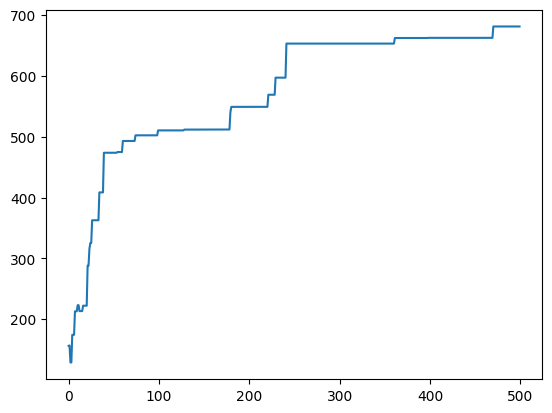

In [8]:
import matplotlib.pyplot as plt


plt.plot(grneat.best_fit_history)